<a href="https://colab.research.google.com/github/Huksons1683/Convolution2D_model/blob/main/Conv2D_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-08-01 19:22:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   112MB/s    in 0.6s    

2021-08-01 19:22:42 (112 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os 
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/temp')
zip_ref.close()

In [ ]:
base_dir = '/temp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join( train_dir, 'cats')
train_dogs_dir = os.path.join( train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [ ]:
train_cats_fnames =os.listdir(train_cats_dir)
train_dogs_fnames =os.listdir(train_dogs_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.201.jpg', 'cat.729.jpg', 'cat.775.jpg', 'cat.156.jpg', 'cat.222.jpg', 'cat.227.jpg', 'cat.498.jpg', 'cat.308.jpg', 'cat.839.jpg', 'cat.800.jpg']
['dog.820.jpg', 'dog.770.jpg', 'dog.329.jpg', 'dog.822.jpg', 'dog.838.jpg', 'dog.920.jpg', 'dog.466.jpg', 'dog.441.jpg', 'dog.134.jpg', 'dog.231.jpg']


In [ ]:
print("Total no of training cats images: ", len(os.listdir(train_cats_dir)))
print("Total no of training dogs images: ", len(os.listdir(train_dogs_dir)))
print("Total no of validation cat images: ", len(os.listdir(validation_cats_dir)))
print("Total no of validation dogs images: ", len(os.listdir(validation_dogs_dir)))

Total no of training cats images:  1000
Total no of training dogs images:  1000
Total no of validation cat images:  500
Total no of validation dogs images:  500


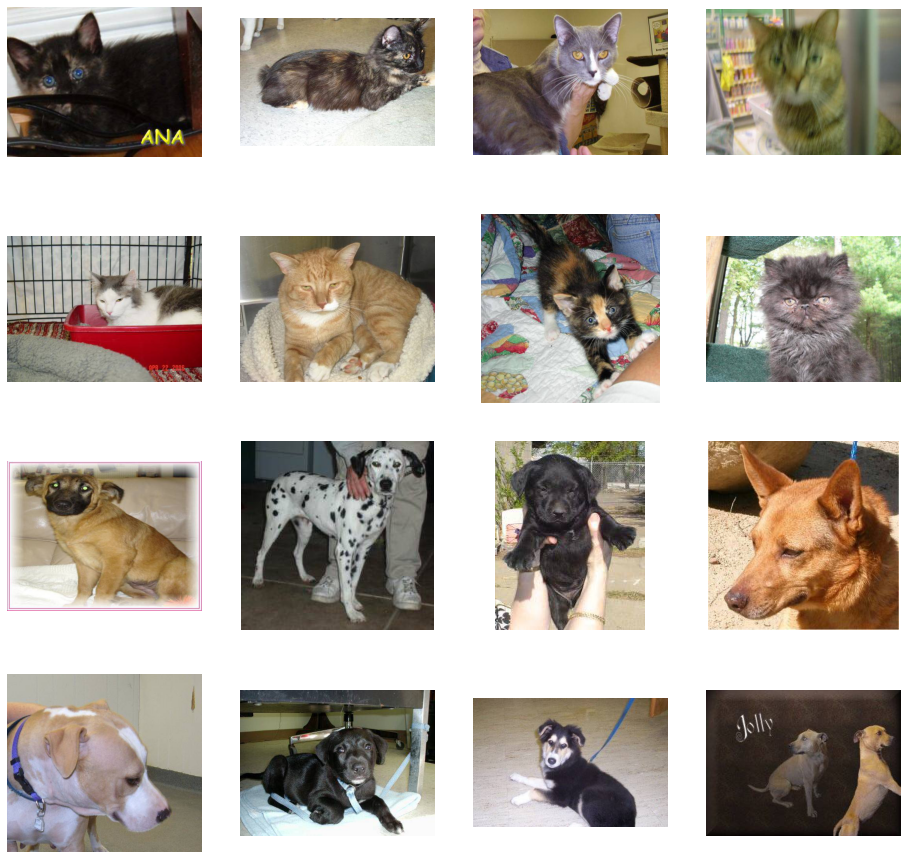

In [ ]:
%matplotlib inline

import matplotlib.pyplot as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(), 
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'), 
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_geneartor(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=2,
                              validation_steps=50,
                              verbose=2)

NameError: ignored

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
import numpy as np

successive_outputs = [layer.output for layer in model.layers[1:]]

vizulization_model = tf.keras.models.Model(inputs = model.inputs , outputs = successive_outputs

cat_images_files = [os.join.path(train_cats_dir, f) for f in train_cats_fnames]
dog_images_files = [os.join.path(train_dogs_dir, f) for f in train_dogs_fnames]

img_path = random.choice(cat_images_files+dog_images_files)
img = load_img(path, target_size=(150,150))

x= img_to_array(img)                # Numpy array with shape (150,150,3)
x = x.reshape((1,) + x.shape())     # Numpy array with shape (1,150,150,3)
x /=255.0
successive_feature_maps = vizulization.predict(x)

layer_names = [layer.name for layer in model.layers]

# lets dispalay our representation

for layer_name, feature_name in zip(layer_names, successive_feature_maps):
  if(feature_map == 4):

    # just do for conv/maxpooling not fullu connected layers
    n_features = feature_map.shape[-1] # no of feature in feature_map
    size = feature_map.shape[1] # feature map shape(1,size,size, n_feature)

    # we will title our images in the matrix
    display_grid = np.zeros((size, size* n_features))
  

 # post process the feature to be visually palatable

 for i in range(n_features):

   x = n_features[0, :, :, i]
   x -=x.mean()
   x /=x.std()
   x *= 64
   x += 128

   x = np.clip(x,0,255).astype('unit8')
   display_grid[ : i*size, (i+1)*size]=x

  #  dispaly grid
sacle = 20./n_features
plt.figure(figsize=(scale*n_feature, scale))
plt.title(layer_name)
plt.grid(False)
plt.imshow(dispaly_grid, aspect ='auto' cmap = 'viridus')

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

vizualization_model = tf.keras.models.Model[ inputs = model.input, outputs = successive_outputs]

cats_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dogs_img_files = [os.path.join(train_dogs_dir, f) for f in tarin_dogs_fnames]

img_path = random.choice(cats_img_files + dogs_img_files)
img = load_img(img_path, target_size = (150, 150))
x = img_to_array(img)
x = x.reshape((1,), x.shape())

x /= 255.0

successive_feature_maps = vizualization_model.predict(x)
# layer name to be part of our plot
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, succesive_feature_maps):
  if(len(feature_map==4)):
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
#title our image in the matrix
    dispaly_grid = np.zeros(size, size*n_feature)

# post process our feature in visually platable
for i in range(n_features):
  x = feature_map[0,:,:, 1]
  x -= x.mean()
  x /= x.std()
  x *= 64
  x += 128

  x = np.clip(x, 0, 255).astype('unit8')

  dispaly_grid[ : i* size : (i+1)* size] = x

scale = 20./n_features
figure = plt(figsize = (scale*n_features, scale ))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect = auto , cmap='viridus')





